In [1]:
#Je vais cluster par joueurs , : x , Nombre de matchs gagnés : y
import pandas as pd
import random
team_home = pd.read_csv('train_home_team_statistics_df.csv')
team_away = pd.read_csv('train_away_team_statistics_df.csv')
team = pd.concat([team_home, team_away])
team.head(10)



,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
0,0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
3,3,League One,Coventry City,7.0,5.0,5.0,6.0,6.0,9.0,9.0,...,4.0,0.0,1.0,8.0,8.0,5.0,5.0,5.0,NaN,6.0
4,4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0
5,5,Liga Portugal,Sporting CP,7.0,6.0,9.0,5.0,10.0,8.0,9.0,...,10.0,8.0,1.0,6.0,4.0,0.0,10.0,4.0,2.0,1.0
6,6,La Liga,Sevilla,7.0,9.0,6.0,3.0,3.0,3.0,4.0,...,6.0,8.0,0.0,7.0,5.0,0.0,5.0,2.0,4.0,3.0
7,7,Ligue 1,Bordeaux,3.0,1.0,5.0,3.0,7.0,4.0,3.0,...,0.0,0.0,3.0,7.0,8.0,0.0,6.0,7.0,5.0,4.0
8,8,Superliga,Lyngby,0.0,0.0,0.0,0.0,0.0,10.0,10.0,...,0.0,10.0,0.0,0.0,NaN,10.0,10.0,0.0,NaN,0.0
9,9,Bundesliga,Borussia Dortmund,7.0,7.0,6.0,7.0,6.0,10.0,10.0,...,0.0,0.0,4.0,4.0,8.0,1.0,0.0,9.0,7.0,4.0


In [2]:
from sklearn.cluster import KMeans
import random
all_keys = team.keys()


In [3]:
random.seed(10)
model = KMeans(n_clusters=3, random_state=0)
chosen_features = team[team.keys()[3:143]]
chosen_features.select_dtypes(include = ["float64"])
chosen_features.dropna(inplace=True)
model.fit(chosen_features)
res_labels = model.labels_
res_labels


<ipython-input-3-7735631df551>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chosen_features.dropna(inplace=True)


array([1, 0, 1, ..., 1, 0, 2], dtype=int32)

In [4]:
len(team.keys())

143

In [5]:
model.labels_.shape

(16774,)

In [6]:
team.shape

(24606, 143)

In [17]:
chosen_features.insert(4 , "KMeansClass", model.labels_, True)


In [18]:
chosen_features.keys()

Index(['TEAM_SHOTS_TOTAL_season_sum', 'TEAM_SHOTS_INSIDEBOX_season_sum',
       'TEAM_SHOTS_OFF_TARGET_season_sum', 'TEAM_SHOTS_ON_TARGET_season_sum',
       'KMeansClass', 'KMeansClass', 'TEAM_SHOTS_OUTSIDEBOX_season_sum',
       'TEAM_PASSES_season_sum', 'TEAM_SUCCESSFUL_PASSES_season_sum',
       'TEAM_SAVES_season_sum',
       ...
       'TEAM_YELLOWCARDS_5_last_match_std', 'TEAM_REDCARDS_5_last_match_std',
       'TEAM_OFFSIDES_5_last_match_std', 'TEAM_ATTACKS_5_last_match_std',
       'TEAM_PENALTIES_5_last_match_std',
       'TEAM_SUBSTITUTIONS_5_last_match_std',
       'TEAM_BALL_SAFE_5_last_match_std',
       'TEAM_DANGEROUS_ATTACKS_5_last_match_std',
       'TEAM_INJURIES_5_last_match_std', 'TEAM_GOALS_5_last_match_std'],
      dtype='object', length=142)

ValueError: Length of values (16774) does not match length of index (24606)

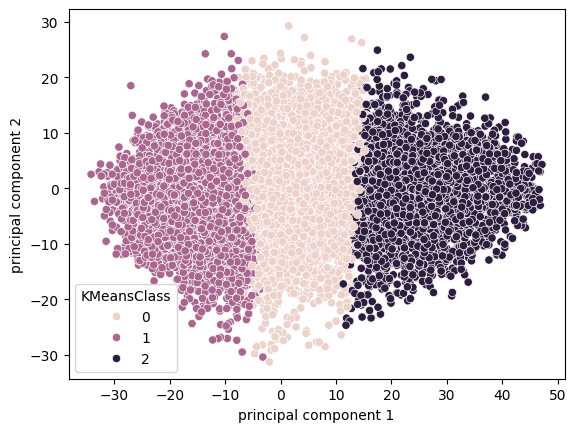

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
chosen_features_pca = pca.fit_transform(chosen_features.select_dtypes(include = ["float64"]))
principalDf = pd.DataFrame(data = chosen_features_pca, columns = ['principal component 1', 'principal component 2'])
principalDf.insert(2 , "KMeansClass", model.labels_, True)
sns.scatterplot(x= 'principal component 1', y= 'principal component 2', hue="KMeansClass", data=principalDf)
kmeans_pca = KMeans(n_clusters=3, random_state=0)
team["KMeansClass"] = kmeans_pca.fit_predict(chosen_features_pca)
plt.show()

In [24]:
# to store WCSS
wcss = []

# for loop
for i in range(1, 11):

    # k-mean cluster model for different k values
    kmeans=KMeans(n_clusters=i,random_state = 0)
    kmeans.fit(principalDf[['principal component 1', 'principal component 2']])

    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)


<Axes: xlabel='Number of clusters', ylabel='WCSS'>

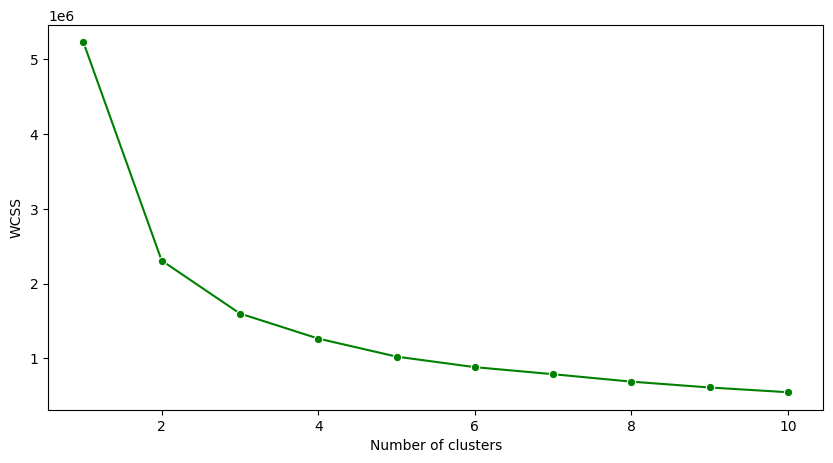

In [25]:
data = pd.DataFrame({'Number of clusters': range(1, 11), 'WCSS': wcss})

# figure size
plt.figure(figsize=(10,5))
# Use the 'x' and 'y' parameters to specify the columns
sns.lineplot(x='Number of clusters', y='WCSS', data=data, marker='o', color='green')